# 本金平均攤還試算

本金平均攤還意即在各期要償還固定金額的本金，也就是拿本金總額除以總期數，就是各期應償還的本金額。
隨著各期本金的償還，剩餘未償還本金的數額會逐期下降，該期所應支付的利息也會跟著減少

作業一中所提供的試算超連結

[本金平均攤還試算](https://ttc.scu.org.tw/memdca1.htm)

以200萬元，兩年，利息1%下去試算的結果如下方圖片，等等寫完code就用這組數據測試

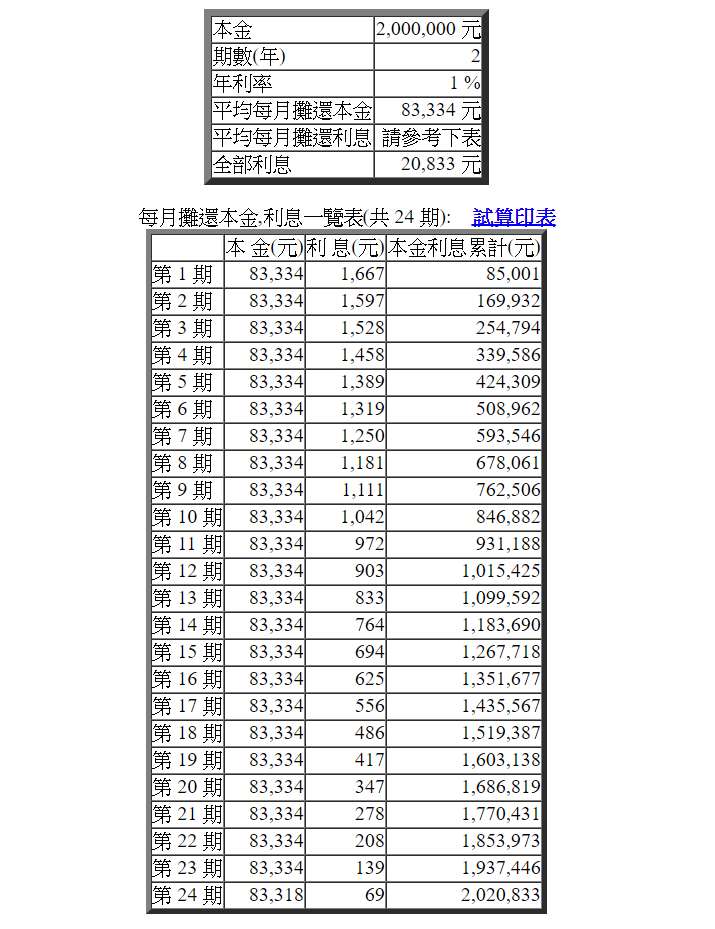

# 先說明程式的功能

In [1]:
print('本金平均攤還試算')

本金平均攤還試算


In [2]:
print('請您按照順序分別輸入數據，即可得出每期攤還所需費用')

請您按照順序分別輸入數據，即可得出每期攤還所需費用


# 需要使用者輸入資料

請使用者輸入本金大小，以萬元計，由於含有小數點，input資料type選擇float

In [3]:
principal_w=float(input('本金(萬): '))

本金(萬): 200


先將萬元計的本金轉成完整數值

In [4]:
principal=principal_w*10000

接下來是期數，請使用者輸入年數，input資料type選擇int

In [5]:
period=int(input('期數(年): '))

期數(年): 2


接下來請使用者輸入利率

In [6]:
interest_rate_percent=float(input('年利率(%): '))

年利率(%): 1


由於一年共12期故先轉換成每個月的利率

In [7]:
interest_rate=interest_rate_percent/1200

由於各期初剩餘本金都不相同，需要扣減，此外各期利率由各期剩餘本金乘以月利率而得，因此需要一個for loop來計算，另外想將試算表輸出成csv增加可讀性，因此得先建立文件，然後在loop中的每個cycle寫入各期應付本金、利息的資訊，一開始剩餘本金為初始本金，一開始並無應付利息因此先設為零，然後各期應付本金可以先計算

In [8]:
remain_principal=principal

In [9]:
should_interest=0

In [10]:
should_principal=round((principal/12)/period, 3)

In [11]:
sum_interest_prinicpal=0

先設定csv文件名稱

In [12]:
name='本金'+str(principal_w)+'萬元'+str(period)+'年期'+'年利率'+str(interest_rate_percent)+'%'

然後建立文件，寫入各行title

In [13]:
import csv
with open(name+'.csv','w',newline='') as csvfile:
    writer=csv.writer(csvfile)
    writer.writerow([' ','本 金(元)','利 息(元)','本金利息累計(元)'])
    for n in range(1, period*12+1):
        should_interest=round(remain_principal*interest_rate,3)
        sum_interest_prinicpal=sum_interest_prinicpal+should_principal+should_interest
        writer.writerow(['第'+str(n)+'期',should_principal,should_interest,sum_interest_prinicpal])
        remain_principal=remain_principal-should_principal

開始跑for loop

輸出的試算表

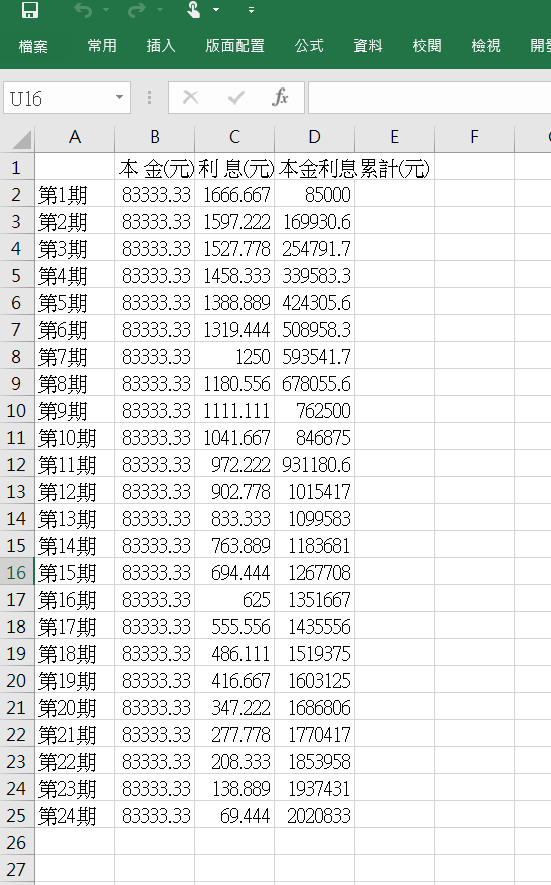